# Step48, 다중 클래스 분류 

spiral dataset 이라는 작은 데이터셋을 사용하여 다중 클래스 분류를 실제로 해본다.

## 48.1 스파이럴 데이터셋 

dezero/datasets.py에 스파이럴 데이터셋을 가져온다.

In [1]:
import dezero 

x, t = dezero.datasets.get_spiral(train=True)   # train=True : 학습데이터, False면 테스트 데이터
print('x의 shape',x.shape)
print('y의 shape',t.shape)

print(x[10], t[10])
print(x[110], t[110])

x의 shape (300, 2)
y의 shape (300,)
[-0.12995958 -0.00324155] 1
[ 0.3282343  -0.54941994] 0


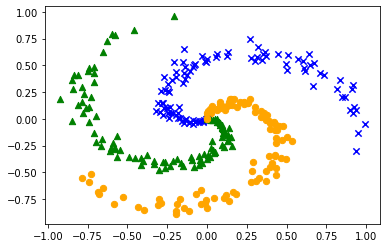

In [2]:
import matplotlib.pyplot as plt
# Plot data points of the dataset
N, CLS_NUM = 100, 3
markers = ['o', 'x', '^']
colors = ['orange', 'blue', 'green']
for i in range(len(x)):
    c = t[i]
    plt.scatter(x[i][0], x[i][1], s=40,  marker=markers[c], c=colors[c])
plt.show()

## 48.2 학습코드 

In [3]:
import math 
import numpy as np 
import dezero 
from dezero import optimizers
import dezero.functions as F 
from dezero.models import MLP 

# 1 하이퍼파라미터 설정 
max_epoch = 300
batch_size = 30 
hidden_size = 10 
lr = 1.0 

# 2 데이터 읽기 / 모델, 옵티마이저 생성 
x, t = dezero.datasets.get_spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(x)
max_iter = math.ceil(data_size / batch_size)    # 소수점 반올림 

for epoch in range(max_epoch):
    # 3 데이터셋의 인덱스 뒤섞기 
    index = np.random.permutation(data_size)
    sum_loss = 0 

    for i in range(max_iter):
        # 4 미니배치 생성 
        batch_index = index[i * batch_size : (i+1) * batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]

        # 5 기울기 산출 / 매개변수 갱신 
        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        sum_loss += float(loss.data) * len(batch_t)
    
    # 6 에포크마다 학습 경과 출력
    avg_loss = sum_loss / data_size
    print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))


epoch 1, loss 1.13
epoch 2, loss 1.05
epoch 3, loss 0.95
epoch 4, loss 0.92
epoch 5, loss 0.87
epoch 6, loss 0.89
epoch 7, loss 0.84
epoch 8, loss 0.78
epoch 9, loss 0.80
epoch 10, loss 0.79
epoch 11, loss 0.78
epoch 12, loss 0.76
epoch 13, loss 0.77
epoch 14, loss 0.76
epoch 15, loss 0.76
epoch 16, loss 0.77
epoch 17, loss 0.78
epoch 18, loss 0.74
epoch 19, loss 0.74
epoch 20, loss 0.72
epoch 21, loss 0.73
epoch 22, loss 0.74
epoch 23, loss 0.77
epoch 24, loss 0.73
epoch 25, loss 0.74
epoch 26, loss 0.74
epoch 27, loss 0.72
epoch 28, loss 0.72
epoch 29, loss 0.72
epoch 30, loss 0.73
epoch 31, loss 0.71
epoch 32, loss 0.72
epoch 33, loss 0.72
epoch 34, loss 0.71
epoch 35, loss 0.72
epoch 36, loss 0.71
epoch 37, loss 0.71
epoch 38, loss 0.70
epoch 39, loss 0.71
epoch 40, loss 0.70
epoch 41, loss 0.71
epoch 42, loss 0.70
epoch 43, loss 0.70
epoch 44, loss 0.70
epoch 45, loss 0.69
epoch 46, loss 0.69
epoch 47, loss 0.71
epoch 48, loss 0.70
epoch 49, loss 0.69
epoch 50, loss 0.69
epoch 51,

1에서 하이퍼파라미터 설정
- max_epoch = 300, 준비된 데이터셋을 모두 한번 살펴봤을때 1 epoch  
- 배치 크기는 30으로 데이터를 30개씩 묶어서 처리  
데이터가 많을 때 모든 데이터를 한꺼번에 처리하는 대신 조금씩 무작위로 모아서 처리, 이때 데이터 뭉치를 미니배치(mini batch)라고 한다.

2 데이터를 읽고 모델과 옵티마이저를 생성 

3 np.random.permutation 함수를 사용하여 데이터셋의 인덱스를 무작위로 섞는다.  
인수로 N을 주면 0부터 N-1까지의 정수가 무작위로 배열된 리스트를 반환  
epoch 별로 inde = np.random.permutation(data_size) : 무작위로 정렬된 index 리스트를 새로 새로 생성

4 미니배치 생성. 미니배치의 인덱스(batch_index)는 방금 생성한 index에서 앞에서부터 차례로 꺼내 사용 

5 기울기를 구하고 매개변수를 갱신 

6 epoch마다 loss function의 결과를 출력

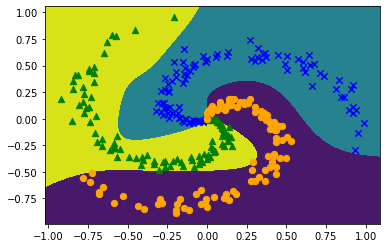

In [4]:
# Plot boundary area the model predict
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]

with dezero.no_grad():
    score = model(X)
predict_cls = np.argmax(score.data, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)

# Plot data points of the dataset
N, CLS_NUM = 100, 3
markers = ['o', 'x', '^']
colors = ['orange', 'blue', 'green']
for i in range(len(x)):
    c = t[i]
    plt.scatter(x[i][0], x[i][1], s=40,  marker=markers[c], c=colors[c])
plt.show()